In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [32]:
# Downloading S&P 500 historical data
data = yf.download("^GSPC", start="1972-01-01", end="2025-01-01", progress=False)
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-01-03,0.000000,102.849998,101.190002,101.669998,101.669998,12570000
1972-01-04,0.000000,102.589996,100.870003,102.089996,102.089996,15190000
1972-01-05,0.000000,103.690002,101.900002,103.059998,103.059998,21350000
1972-01-06,0.000000,104.199997,102.660004,103.510002,103.510002,21100000
1972-01-07,0.000000,104.290001,102.379997,103.470001,103.470001,17140000
...,...,...,...,...,...,...
2024-12-24,5984.629883,6040.100098,5981.439941,6040.040039,6040.040039,1757720000
2024-12-26,6024.970215,6049.750000,6007.370117,6037.589844,6037.589844,2904530000
2024-12-27,6006.169922,6006.169922,5932.950195,5970.839844,5970.839844,3159610000


In [33]:
annual_returns = data['Adj Close'].resample('Y').ffill().pct_change().dropna()
display(annual_returns)

C:\Users\math_\AppData\Local\Temp\ipykernel_32472\1287672958.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = data['Adj Close'].resample('Y').ffill().pct_change().dropna()


Date
1973-12-31   -0.173655
1974-12-31   -0.297181
1975-12-31    0.315490
1976-12-31    0.191485
1977-12-31   -0.115020
1978-12-31    0.010620
1979-12-31    0.123088
1980-12-31    0.257736
1981-12-31   -0.097304
1982-12-31    0.147613
1983-12-31    0.172710
1984-12-31    0.014006
1985-12-31    0.263334
1986-12-31    0.146204
1987-12-31    0.020275
1988-12-31    0.124008
1989-12-31    0.272505
1990-12-31   -0.065591
1991-12-31    0.263067
1992-12-31    0.044643
1993-12-31    0.070552
1994-12-31   -0.015393
1995-12-31    0.341107
1996-12-31    0.202637
1997-12-31    0.310082
1998-12-31    0.266686
1999-12-31    0.195260
2000-12-31   -0.101392
2001-12-31   -0.130427
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-1

In [34]:
# Average return
average_return = annual_returns.mean()
print(average_return*100, '%')

9.271835106920904 %


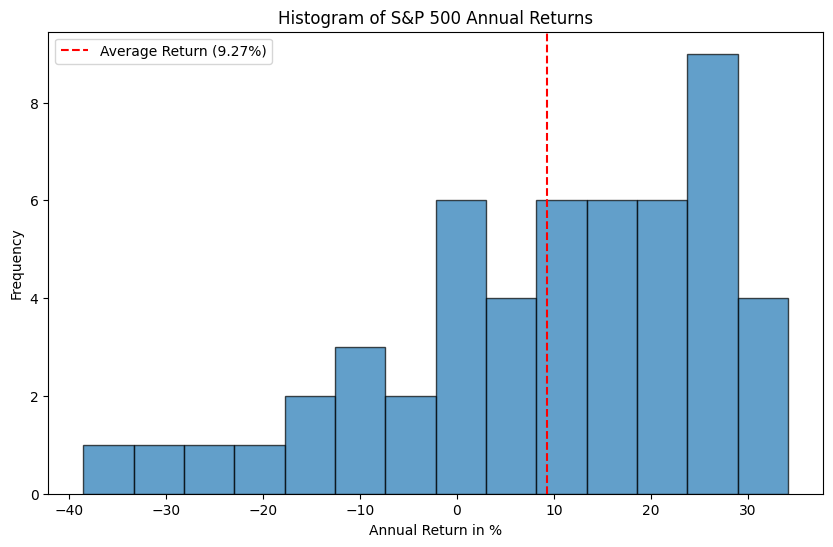

In [35]:
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(annual_returns*100, bins=14, edgecolor='k', alpha=0.7)
plt.axvline(average_return*100, color='r', linestyle='--', label=f'Average Return ({average_return:.2%})')
plt.title("Histogram of S&P 500 Annual Returns")
plt.xlabel("Annual Return in %")
plt.ylabel("Frequency")
plt.legend()
plt.show()

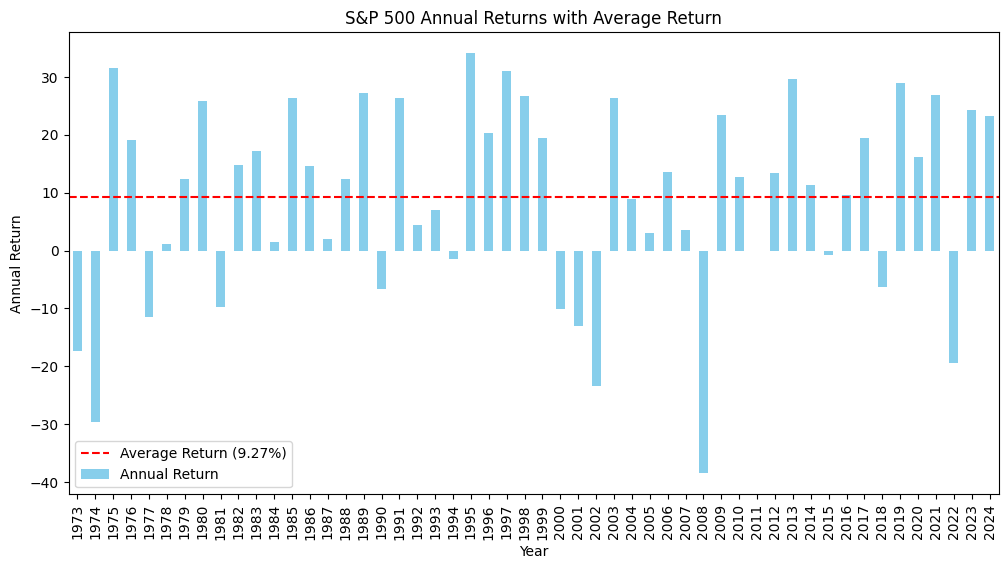

In [38]:
# Plotting bar plot with avg line
plt.figure(figsize=(12, 6))
annual_returns.index = annual_returns.index.year
(annual_returns*100).plot(kind='bar', color='skyblue', label='Annual Return')
plt.axhline(average_return*100, color='r', linestyle='--', label=f'Average Return ({average_return:.2%})')
plt.title("S&P 500 Annual Returns with Average Return")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.show()